In [1]:
import sqlite3

# Connect to SQLite (creates file if it doesn't exist)
conn = sqlite3.connect("student_records.db")
cursor = conn.cursor()

# Create table if not exists
cursor.execute("""
CREATE TABLE IF NOT EXISTS students (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    roll_no TEXT UNIQUE NOT NULL,
    department TEXT,
    marks REAL
)
""")
conn.commit()
print("✅ Database and table ready!")


✅ Database and table ready!


In [3]:
def add_student(name, roll_no, department, marks):
    try:
        cursor.execute("INSERT INTO students (name, roll_no, department, marks) VALUES (?, ?, ?, ?)",
                       (name, roll_no, department, marks))
        conn.commit()
        print(f"✅ Student {name} added successfully!")
    except sqlite3.IntegrityError:
        print("⚠ Roll number already exists!")

def view_students():
    cursor.execute("SELECT * FROM students")
    rows = cursor.fetchall()
    if rows:
        print("\n📋 Student Records:")
        for row in rows:
            print(row)
    else:
        print("⚠ No records found!")

def update_student(roll_no, new_marks):
    cursor.execute("UPDATE students SET marks = ? WHERE roll_no = ?", (new_marks, roll_no))
    conn.commit()
    if cursor.rowcount:
        print(f"✅ Updated marks for Roll No: {roll_no}")
    else:
        print("⚠ Student not found!")

def delete_student(roll_no):
    cursor.execute("DELETE FROM students WHERE roll_no = ?", (roll_no,))
    conn.commit()
    if cursor.rowcount:
        print(f"🗑 Deleted student with Roll No: {roll_no}")
    else:
        print("⚠ Student not found!")


In [4]:
# Add students
add_student("Alice", "CSE101", "CSE", 88.5)
add_student("Bob", "ECE102", "ECE", 75.0)
add_student("Charlie", "ME103", "Mechanical", 92.0)

# View all students
view_students()

# Update student marks
update_student("CSE101", 90.0)

# Delete a student
delete_student("ECE102")

# View again
view_students()


✅ Student Alice added successfully!
✅ Student Bob added successfully!
✅ Student Charlie added successfully!

📋 Student Records:
(1, 'Alice', 'CSE101', 'CSE', 88.5)
(2, 'Bob', 'ECE102', 'ECE', 75.0)
(3, 'Charlie', 'ME103', 'Mechanical', 92.0)
✅ Updated marks for Roll No: CSE101
🗑 Deleted student with Roll No: ECE102

📋 Student Records:
(1, 'Alice', 'CSE101', 'CSE', 90.0)
(3, 'Charlie', 'ME103', 'Mechanical', 92.0)



📊 Students Data:
    id     name roll_no  department  marks
0   1    Alice  CSE101         CSE   90.0
1   3  Charlie   ME103  Mechanical   92.0


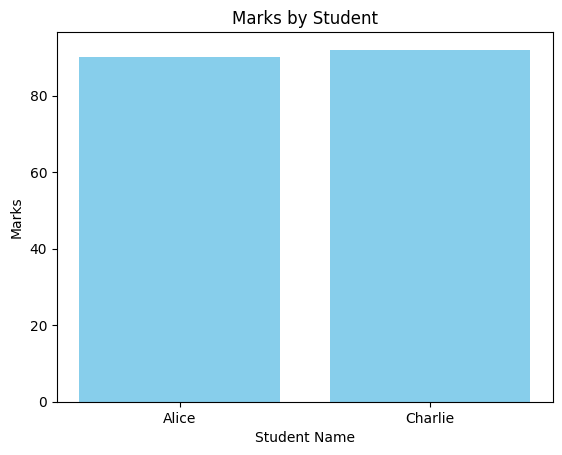

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data into Pandas DataFrame
df = pd.read_sql_query("SELECT * FROM students", conn)

if not df.empty:
    print("\n📊 Students Data:\n", df)

    # Bar chart: Marks by Student
    plt.bar(df['name'], df['marks'], color='skyblue')
    plt.title("Marks by Student")
    plt.xlabel("Student Name")
    plt.ylabel("Marks")
    plt.show()
else:
    print("⚠ No data for analytics!")
